In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data and view

In [2]:
df = pd.read_csv("./Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.shape

(34857, 21)

### Sumarise dataset

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
df.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

### Check for null values

In [8]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [9]:
df2 = df.dropna()

In [10]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [11]:
df2.reset_index(inplace=True)

In [12]:
df2.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
1,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
2,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
3,11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
4,14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [13]:
df2 = df2.drop(['index'], axis=1)

In [14]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [15]:
df2.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [16]:
df2.describe(include=['object'])

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
count,8887,8887,8887,8887,8887,8887,8887
unique,315,8764,3,5,250,33,8
top,Reservoir,1/1 Clarendon St,h,S,Nelson,Boroondara City Council,Southern Metropolitan
freq,194,3,6625,5602,986,810,2707


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   object        
 1   Address        8887 non-null   object        
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   object        
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   object        
 6   SellerG        8887 non-null   object        
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   float64       
 10  Bedroom2       8887 non-null   float64       
 11  Bathroom       8887 non-null   float64       
 12  Car            8887 non-null   float64       
 13  Landsize       8887 non-null   float64       
 14  BuildingArea   8887 non-null   float64       
 15  YearBuilt      8887 n

## EDA

In [18]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
TITLE_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title

In [19]:
df2 = df2[['Suburb', 'Address', 'Price', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]

Text(0.5, 1.0, 'Correlation Matrix Plot of Variables')

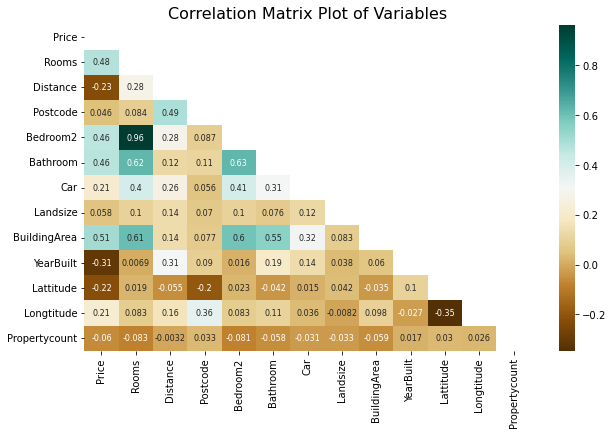

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
mask = np.triu(np.ones_like(df2.corr()))
sns.heatmap(df2.corr(), annot=True, cmap='BrBG', mask=mask)
ax.set_title('Correlation Matrix Plot of Variables')

The correlation plot shows that most the variables are not correlated the price of the properties, with the exception of the number of rooms, bathrooms and size of the building area. These exceptions however are expected as it is well known that these factors are key to evaluating the cost of purchasing a house.

Text(0.5, 1.0, 'No. of Houses in each region')

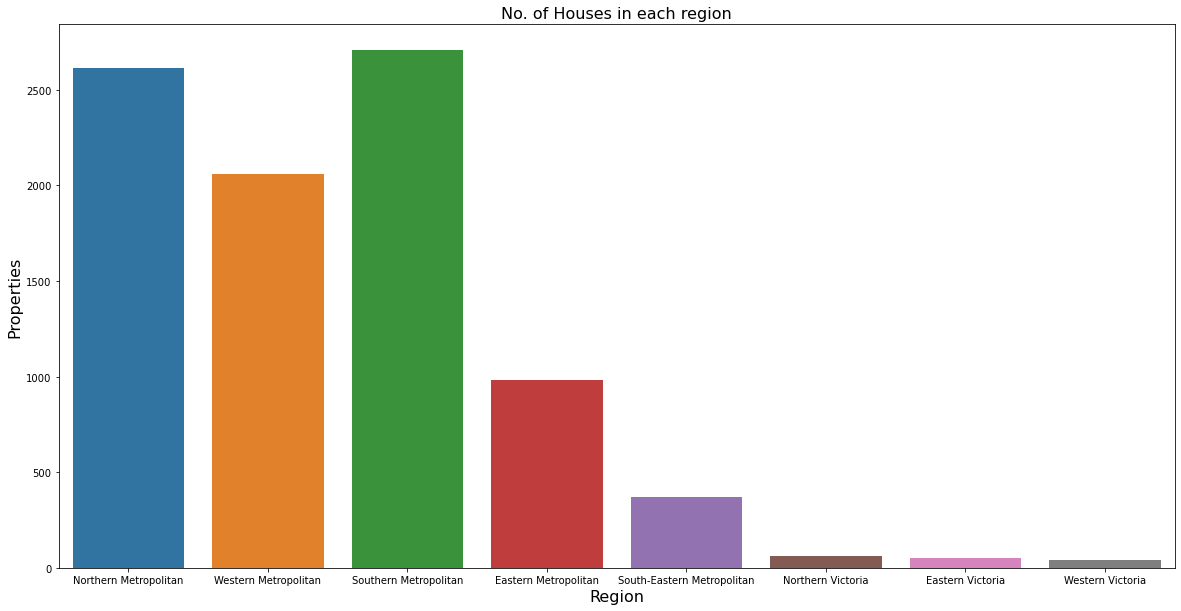

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data = df2, x='Regionname')
plt.xlabel('Region')
plt.ylabel('Properties')
plt.title('No. of Houses in each region')

In [22]:
BBox = (df2.Longtitude.min(),   df2.Longtitude.max(),      
         df2.Lattitude.min(), df2.Lattitude.max())
print(BBox)

(144.42379, 145.52635, -38.17436, -37.4072)


In [23]:
ruh_m = plt.imread('C:/Users/Developer/Datasets/Melbourne_housing/map.png')

In [24]:
colors = {'Northern Metropolitan':'#00FFFF', 'Southern Metropolitan':'#E3CF57', 'Western Metropolitan':'#528B8B',
          'Eastern Metropolitan':'#66CD00', 'South-Eastern Metropolitan':'#FF1493', 'Eastern Victoria':'#FF3030',
          'Western Victoria':'#BF3EFF', 'Northern Victoria':'#8B4513'}

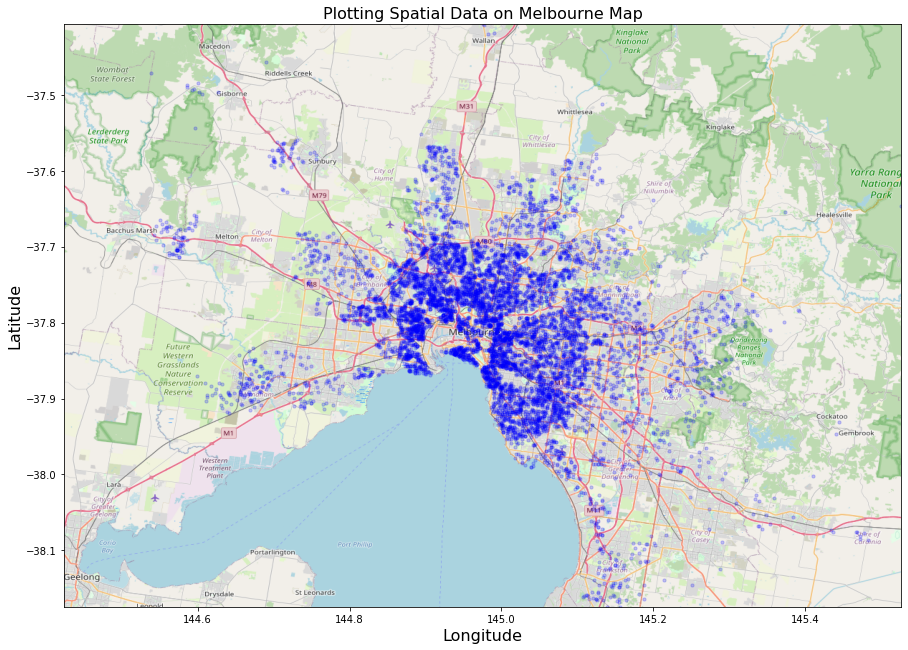

In [25]:
fig, ax = plt.subplots(figsize = (15,12))
ax.scatter(df2.Longtitude, df2.Lattitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Melbourne Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

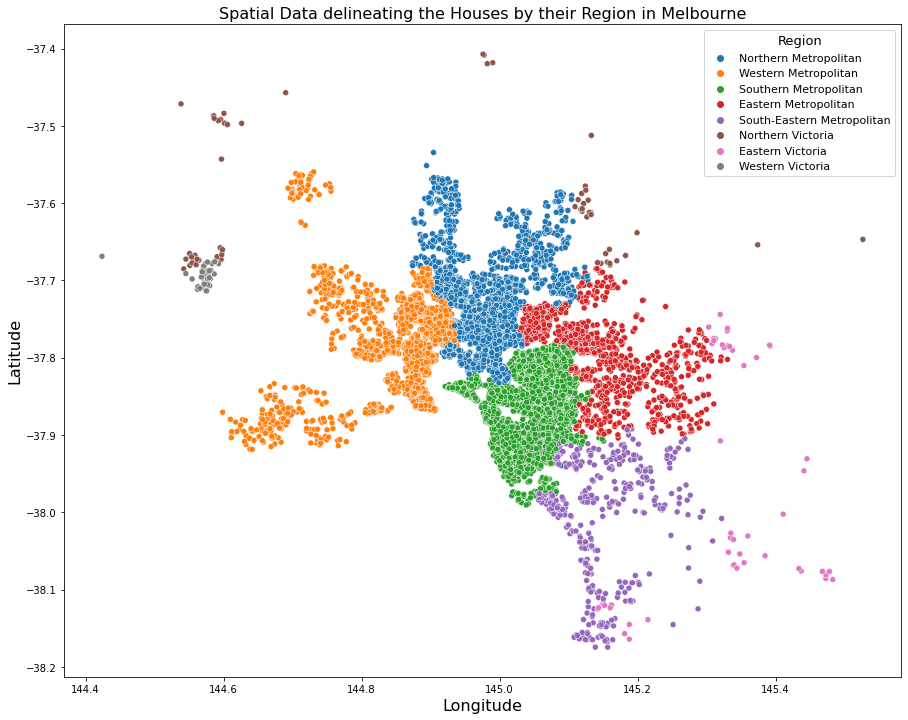

In [26]:
fig, ax = plt.subplots(figsize=(15,12))
sns.scatterplot(data= df2, x= 'Longtitude', y= 'Lattitude', hue= 'Regionname')
ax.set_title('Spatial Data delineating the Houses by their Region in Melbourne')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(title='Region',  title_fontsize = 13, fontsize = 11)

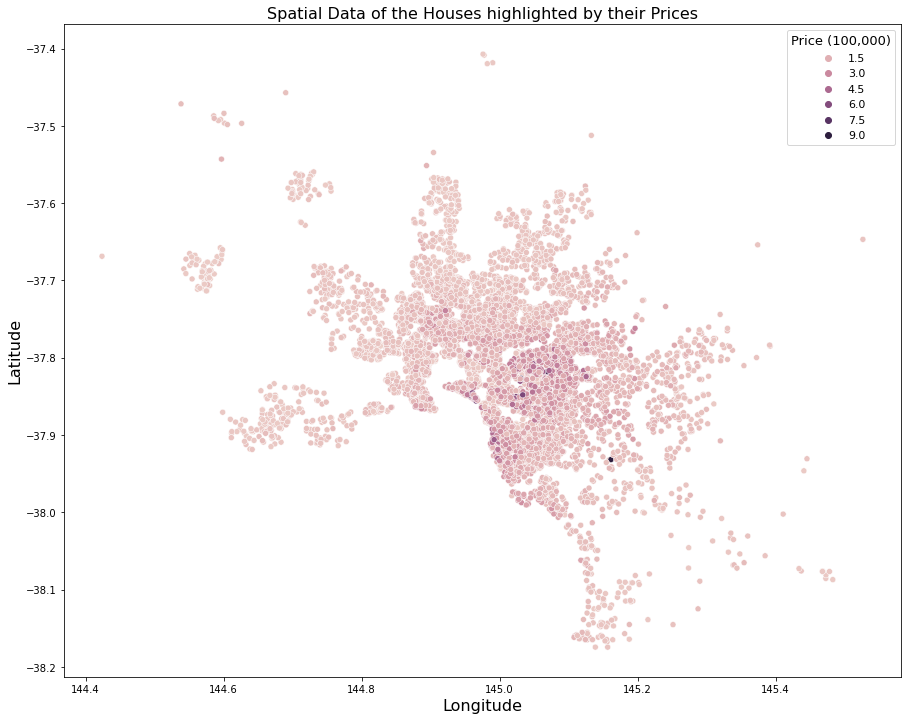

In [27]:
fig, ax = plt.subplots(figsize=(15,12))
sns.scatterplot(data= df2, x= 'Longtitude', y= 'Lattitude', hue= 'Price')
plt.title('Spatial Data of the Houses highlighted by their Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price (100,000)',  title_fontsize = 13, fontsize = 11)

In [28]:
pd.set_option('display.float_format', '{:.2f}'.format)
df2.groupby(by=('Regionname'))['Price'].mean().sort_values(ascending=False)

Regionname
Southern Metropolitan        1493322.95
Eastern Metropolitan         1157120.50
South-Eastern Metropolitan    922715.88
Western Metropolitan          878367.19
Northern Metropolitan         877852.07
Eastern Victoria              661842.78
Northern Victoria             599040.32
Western Victoria              445802.33
Name: Price, dtype: float64

In [29]:
df2['CouncilArea'].value_counts()

Boroondara City Council           810
Darebin City Council              729
Moreland City Council             647
Moonee Valley City Council        556
Glen Eira City Council            519
Maribyrnong City Council          490
Melbourne City Council            456
Brimbank City Council             416
Banyule City Council              413
Hume City Council                 390
Bayside City Council              362
Port Phillip City Council         329
Yarra City Council                323
Monash City Council               299
Hobsons Bay City Council          289
Stonnington City Council          280
Manningham City Council           267
Whittlesea City Council           242
Kingston City Council             209
Wyndham City Council              169
Whitehorse City Council           126
Melton City Council               107
Maroondah City Council            107
Knox City Council                 103
Frankston City Council             87
Greater Dandenong City Council     51
Casey City C

In [30]:
len(df2['CouncilArea'].value_counts())

33

In [31]:
df2.groupby(by=(['CouncilArea']))['Price'].mean().sort_values(ascending=False).head()

CouncilArea
Boroondara City Council    1827678.69
Bayside City Council       1711756.04
Stonnington City Council   1685503.42
Manningham City Council    1271688.64
Monash City Council        1255221.74
Name: Price, dtype: float64

In [32]:
df2.groupby(by=(['CouncilArea']))['Price'].mean().sort_values().head()

CouncilArea
Moorabool Shire Council   412000.00
Mitchell Shire Council    422750.00
Melton City Council       527271.96
Cardinia Shire Council    553958.33
Wyndham City Council      570626.98
Name: Price, dtype: float64

In [33]:
df_council = df2.groupby(by=(['Regionname','CouncilArea']))
council_area_mean = df_council['Price'].mean()
print(council_area_mean)

Regionname                  CouncilArea                   
Eastern Metropolitan        Banyule City Council             1050273.97
                            Boroondara City Council          1814529.41
                            Knox City Council                 909434.19
                            Manningham City Council          1271688.64
                            Maroondah City Council            934411.21
                            Monash City Council              1477484.81
                            Nillumbik Shire Council          1020000.00
                            Whitehorse City Council          1242794.35
Eastern Victoria            Cardinia Shire Council            553958.33
                            Casey City Council                755550.00
                            Frankston City Council            574363.64
                            Yarra Ranges Shire Council        735165.67
Northern Metropolitan       Banyule City Council              825679.75
     

## Regression analysis

Carry out a regression analysis on the dataset to build a model that predicts the price of the houses

In [34]:
df2.columns

Index(['Suburb', 'Address', 'Price', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [35]:
X = df2.drop(['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea', 'Price'], axis=1)
X.head()

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,S,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,-37.81,144.99,Northern Metropolitan,4019.00
1,3,h,SP,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,-37.81,144.99,Northern Metropolitan,4019.00
2,4,h,VB,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,-37.81,144.99,Northern Metropolitan,4019.00
3,3,h,S,2.50,3067.00,4.00,2.00,0.00,245.00,210.00,1910.00,-37.80,145.00,Northern Metropolitan,4019.00
4,2,h,S,2.50,3067.00,2.00,1.00,2.00,256.00,107.00,1890.00,-37.81,145.00,Northern Metropolitan,4019.00


In [36]:
X = pd.get_dummies(X)
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,-37.81,...,0,0,0,0,1,0,0,0,0,0
1,3,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,-37.81,...,1,0,0,0,1,0,0,0,0,0
2,4,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,-37.81,...,0,1,0,0,1,0,0,0,0,0
3,3,2.50,3067.00,4.00,2.00,0.00,245.00,210.00,1910.00,-37.80,...,0,0,0,0,1,0,0,0,0,0
4,2,2.50,3067.00,2.00,1.00,2.00,256.00,107.00,1890.00,-37.81,...,0,0,0,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of House Prices')

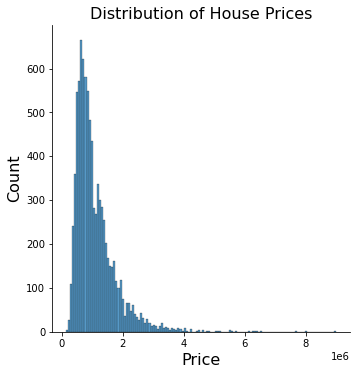

In [37]:
# plot distribution of prices
sns.displot(df2["Price"])
plt.title('Distribution of House Prices')

In [38]:
# take log of charges, then drop old column
df2["log_Price"] = np.log(df2["Price"])

Text(0.5, 4.639999999999986, 'Log of Price')

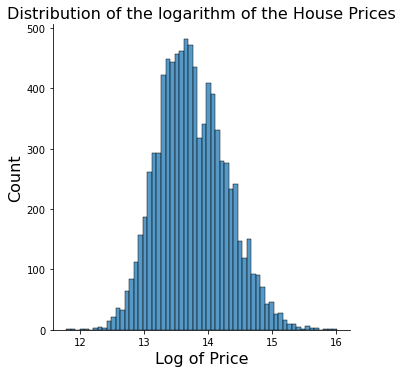

In [39]:
sns.displot(df2.log_Price)
plt.title('Distribution of the logarithm of the House Prices')
plt.xlabel('Log of Price')

In [40]:
y = df2['log_Price']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model = RandomForestRegressor()

In [45]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
model.score(X_train, y_train)

0.9826680234802573

In [47]:
model.score(X_test, y_test)

0.8744997057305847

### Model Evaluation

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [50]:
# Model evaluation on train dataset
r2_train = r2_score(y_train, predictions_train)
mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train)

In [51]:
# print metrics
print("metrics for training data")
print(f"R^2 score : {r2_train:.4f}")
print(f"mae       : {mae_train:.4f}")
print(f"rmse      : {rmse_train:.4f}")

metrics for training data
R^2 score : 0.9827
mae       : 0.0508
rmse      : 0.0050


In [52]:
# Model evaluation on test dataset
r2_test = r2_score(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test)

In [53]:
# print metrics
print("metrics for test data")
print(f"R^2 score : {r2_test:.4f}")
print(f"mae       : {mae_test:.4f}")
print(f"rmse      : {rmse_test:.4f}")

metrics for test data
R^2 score : 0.8745
mae       : 0.1348
rmse      : 0.0351


Text(0, 0.5, 'predicted')

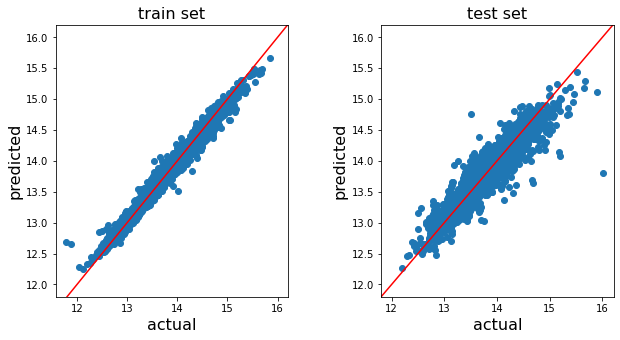

In [54]:
# draw plots for train and test sets
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,5)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

# ax1 - scatter plot of predictions vs actual for train dataset
ax1.scatter(y_train, predictions_train)
ax1.axline([12, 12], [16, 16], color="red")
ax1.set_title("train set")
ax1.set_xlabel("actual")
ax1.set_ylabel("predicted")

# ax2 - scatter plot of predictions vs actual for test dataset
ax2.scatter(y_test, predictions_test)
ax2.axline([12, 12], [16, 16], color="red")
ax2.set_title("test set")
ax2.set_xlabel("actual")
ax2.set_ylabel("predicted")

Text(0.5, 4.639999999999986, 'Residuals')

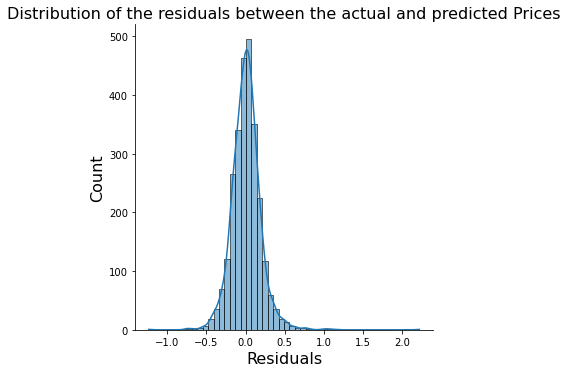

In [55]:
# plot residuals to determine if they are normally distributed
sns.displot((y_test - predictions_test), bins=50, kde=True)
plt.title('Distribution of the residuals between the actual and predicted Prices')
plt.xlabel('Residuals')

In [56]:
# get the predicted house prices
price = np.exp(predictions_test).round(2)
print(f"predicted House Prices: {price}")

predicted House Prices: [ 463706.88  519930.36 1610598.6  ...  581366.43  434250.62  532170.01]
